# Kaggle - Predict CO2 Emissions in Rwanda

### Playground Series - Season 3, Episode 20

---
## Dataset Description
The objective of this challenge is to create machine learning models that use open-source emissions data (from Sentinel-5P satellite observations) to predict carbon emissions.

Approximately 497 unique locations were selected from multiple areas in Rwanda, with a distribution around farm lands, cities and power plants. The data for this competition is split by time; the years 2019 - 2021 are included in the training data, and your task is to predict the CO2 emissions data for 2022 through November.

Seven main features were extracted weekly from Sentinel-5P from January 2019 to November 2022. Each feature (Sulphur Dioxide, Carbon Monoxide, etc) contain sub features such as column_number_density which is the vertical column density at ground level, calculated using the DOAS technique. You can read more about each feature in the below links, including how they are measured and variable definitions. You are given the values of these features in the test set and your goal to predict CO2 emissions using time information as well as these features.

 - Sulphur Dioxide - COPERNICUS/S5P/NRTI/L3_SO2
 - Carbon Monoxide - COPERNICUS/S5P/NRTI/L3_CO
 - Nitrogen Dioxide - COPERNICUS/S5P/NRTI/L3_NO2
 - Formaldehyde - COPERNICUS/S5P/NRTI/L3_HCHO
 - UV Aerosol Index - COPERNICUS/S5P/NRTI/L3_AER_AI
 - Ozone - COPERNICUS/S5P/NRTI/L3_O3
 - Cloud - COPERNICUS/S5P/OFFL/L3_CLOUD
 
Important: Please only use the data provided for this challenge as part of your modeling effort. Do not use any external data, including any data from Sentinel-5P not provided on this page.

Files
train.csv - the training set
test.csv - the test set; your task is to predict the emission target for each week at each location
sample_submission.csv - a sample submission file in the correct format


## Explorative Data Analysis (EDA)

In [1]:
import pandas as pd

#Load train data and visualise the first few rows
df = pd.read_csv("train.csv")

df.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-0.510_29.290_2019_00,-0.51,29.29,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
1,ID_-0.510_29.290_2019_01,-0.51,29.29,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
2,ID_-0.510_29.290_2019_02,-0.51,29.29,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381
3,ID_-0.510_29.290_2019_03,-0.51,29.29,2019,3,NaN,NaN,NaN,NaN,NaN,...,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286
4,ID_-0.510_29.290_2019_04,-0.51,29.29,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,...,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317


In [4]:
#Get info of on columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79023 entries, 0 to 79022
Data columns (total 76 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   ID_LAT_LON_YEAR_WEEK                                      79023 non-null  object 
 1   latitude                                                  79023 non-null  float64
 2   longitude                                                 79023 non-null  float64
 3   year                                                      79023 non-null  int64  
 4   week_no                                                   79023 non-null  int64  
 5   SulphurDioxide_SO2_column_number_density                  64414 non-null  float64
 6   SulphurDioxide_SO2_column_number_density_amf              64414 non-null  float64
 7   SulphurDioxide_SO2_slant_column_number_density            64414 non-null  float64
 8   SulphurDioxide_c

In [5]:
#Check means for exogenous data for weather data should be standardised
df.describe()

,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
count,79023.000000,79023.000000,79023.000000,79023.000000,64414.000000,64414.000000,64414.000000,64414.000000,64414.000000,64414.000000,...,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,79023.000000
mean,-1.891072,29.880155,2020.000000,26.000000,0.000048,0.834848,0.000035,0.158418,-7.925870,37.436189,...,5592.377478,59420.297456,4670.430869,19.139241,0.271460,-10.784832,40.436976,-86.800583,27.925981,81.940552
std,0.694522,0.810375,0.816502,15.297155,0.000272,0.185382,0.000206,0.071364,64.263368,14.149950,...,1428.503002,9051.163609,1359.251583,13.547047,0.049434,30.374462,6.428216,37.837269,4.403835,144.299648
min,-3.299000,28.228000,2019.000000,0.000000,-0.000996,0.241822,-0.000887,0.000000,-179.537059,0.099237,...,1050.661782,24779.033704,1050.496816,1.844529,0.017697,-102.739731,2.998873,-153.464211,10.818288,0.000000
25%,-2.451000,29.262000,2019.000000,13.000000,-0.000096,0.705817,-0.000078,0.110535,-56.782383,28.844520,...,4595.400519,53175.779928,3680.856344,9.974574,0.241453,-30.309170,35.829907,-125.991158,24.686763,9.797995
50%,-1.882000,29.883000,2020.000000,26.000000,0.000024,0.809118,0.000019,0.161855,-12.441726,37.784299,...,5573.854309,59332.532548,4621.755170,15.130688,0.272747,-12.673914,41.119630,-84.644352,28.333630,45.593445
75%,-1.303000,30.471000,2021.000000,39.000000,0.000153,0.942792,0.000121,0.211824,72.059990,47.634875,...,6542.303642,65663.842684,5572.983223,23.785030,0.302892,9.402202,44.446272,-48.132701,31.499883,109.549595
max,-0.510000,31.532000,2021.000000,52.000000,0.004191,1.885239,0.004236,0.299998,122.095200,66.242012,...,12384.239458,89291.615576,11384.239458,250.000000,0.736514,78.223037,65.951248,-22.653170,42.060436,3167.768000


The target variable is contained in the final column "emissions", the longitude, latitude, year and week act as identifiers, while the other data is exogenous data. The means across the exogenous data columns indicate that they have various rangous. Therefore, it would be a good idea to standardise the data before training to keep the unit of measurement from affecting the model performance.

In [1]:
#Let's load the clean training dataset
import data_handling

df = data_handling.load_data()

#Check the number of locations contained in the dataset
len(df["coordinates"].unique())

497

In [1]:
from sktime.utils.plotting import plot_series
import matplotlib.pyplot as plt

df_loc1 = df[df["coordinates"]==(-0.51, 29.29)]

plot_series( df_loc1["emission"], labels=["Location 1"], x_label="Time", y_label = "CO2 emissions")
plt.show()

NameError: name 'df' is not defined

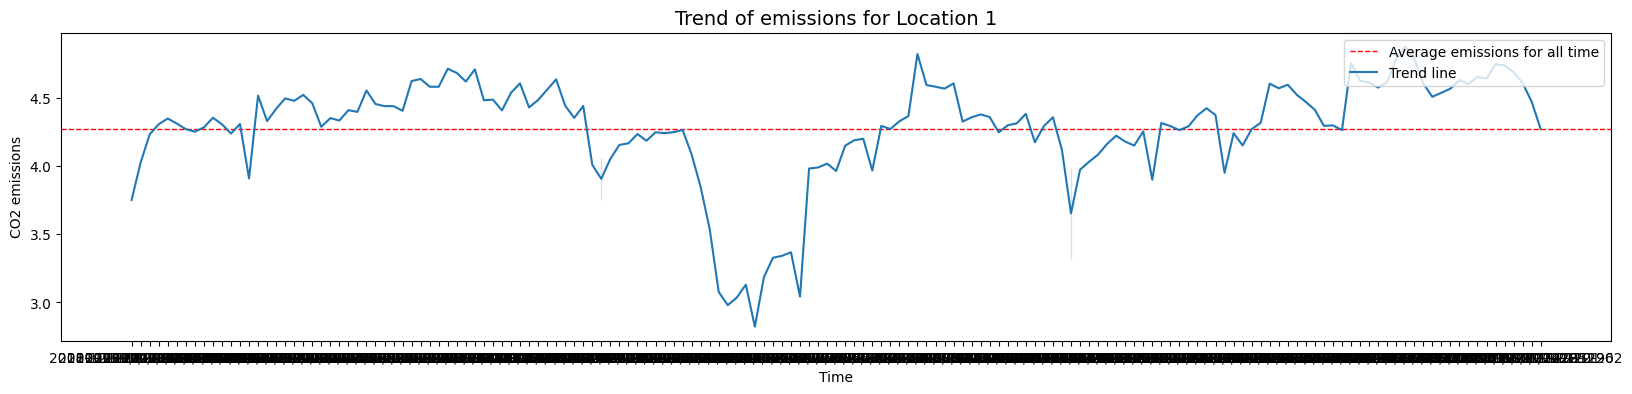

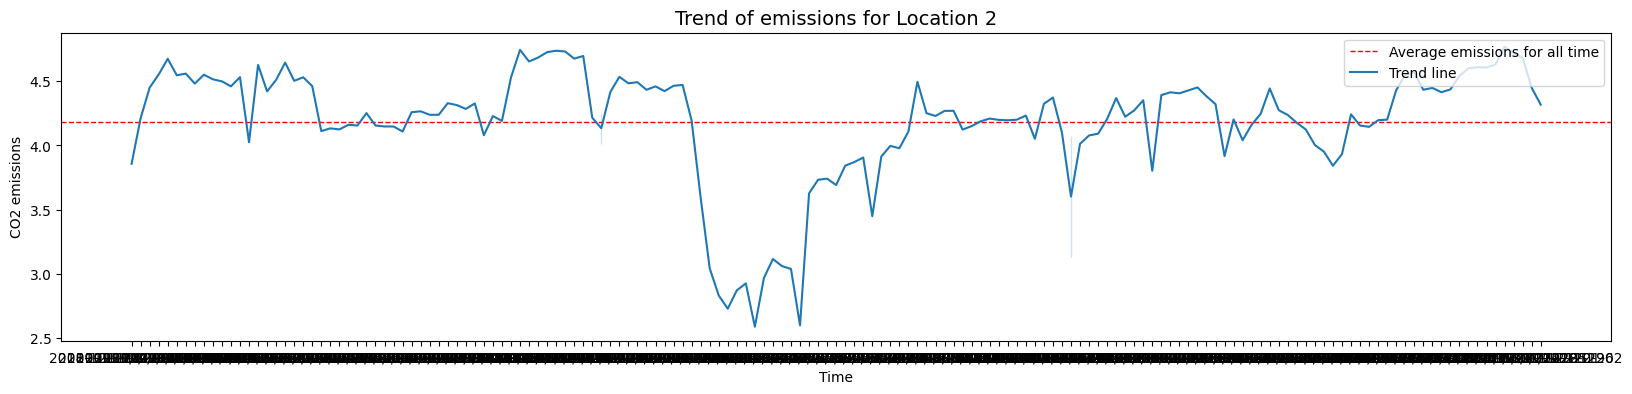

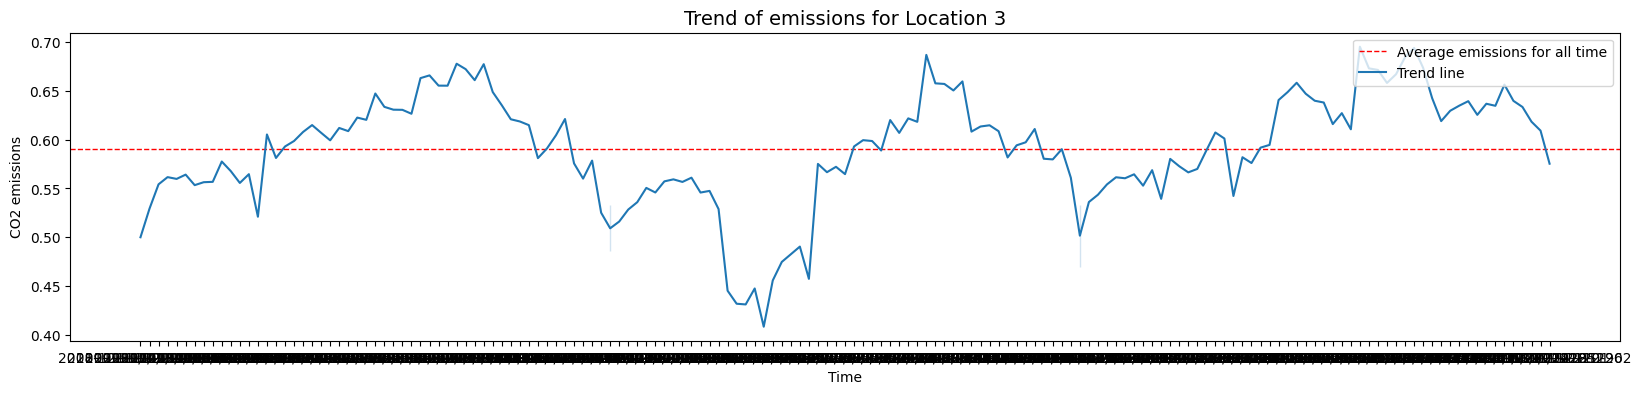

In [3]:
import seaborn as sns

#Labels should be the coordinates of the first three locations in the dataframe
locations = df["coordinates"].unique()[0:3]

loc_counter = 1

for loc in locations:
        df_loc = df[df["coordinates"] == loc]
        index = df_loc.index
        plt.figure(figsize=(20,4))
        plt.axhline (y =df_loc['emission'].mean(), color='red', linewidth = 1, linestyle ='dashed', label = 'Average emissions for all time')
        sns.lineplot(data=df_loc, x=df_loc.index.astype(str), y='emission', label = 'Trend line')
        plt.title(f'Trend of emissions for Location {loc_counter}', fontsize=14)
        plt.legend(loc = 'upper right')
        plt.xlabel('Time')
        plt.ylabel('CO2 emissions')
        plt.show()
        print('\n')

        loc_counter += 1

The emission trends appear to be different for each of the three locations, which indicates we should separate forecasts for each location in the data. Additionally, we can see the same dip in emissions during 2020 due to COVID. It is worth exploring if this is skewing the trend line and should be removed.

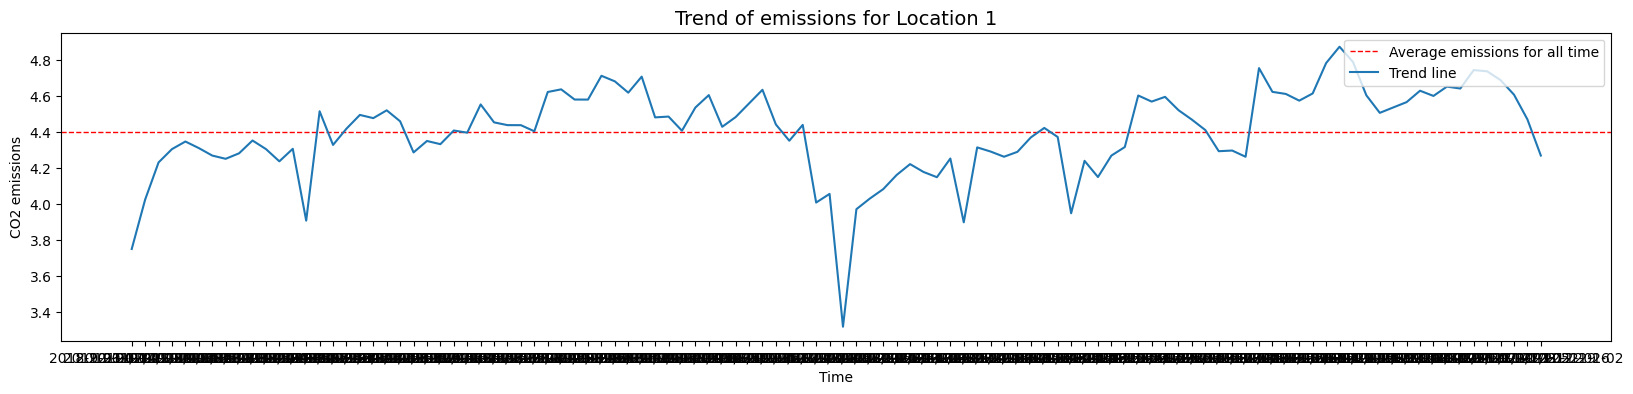

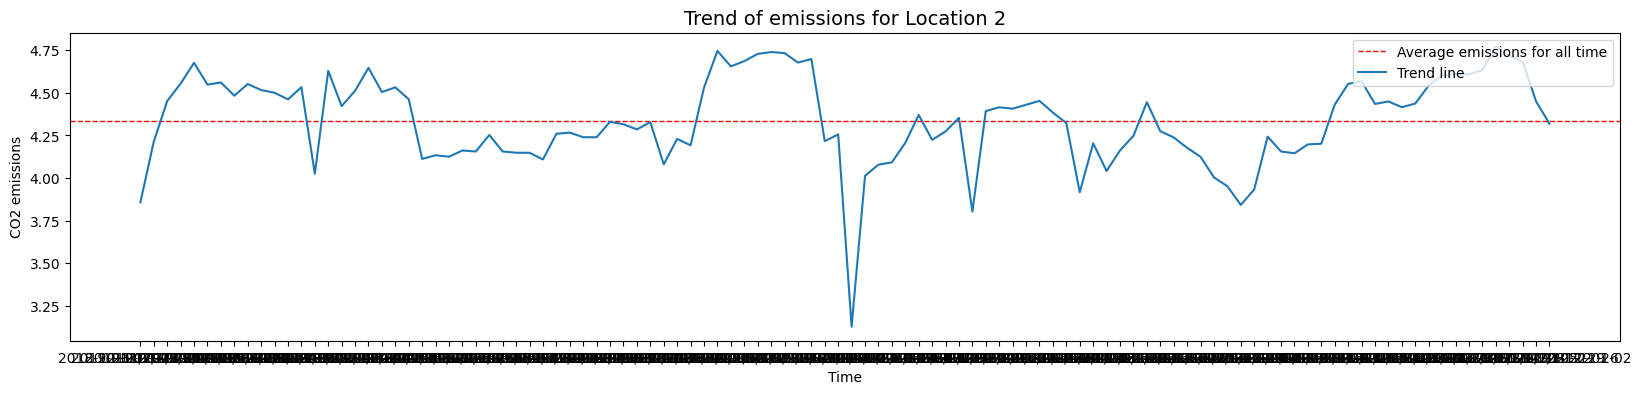

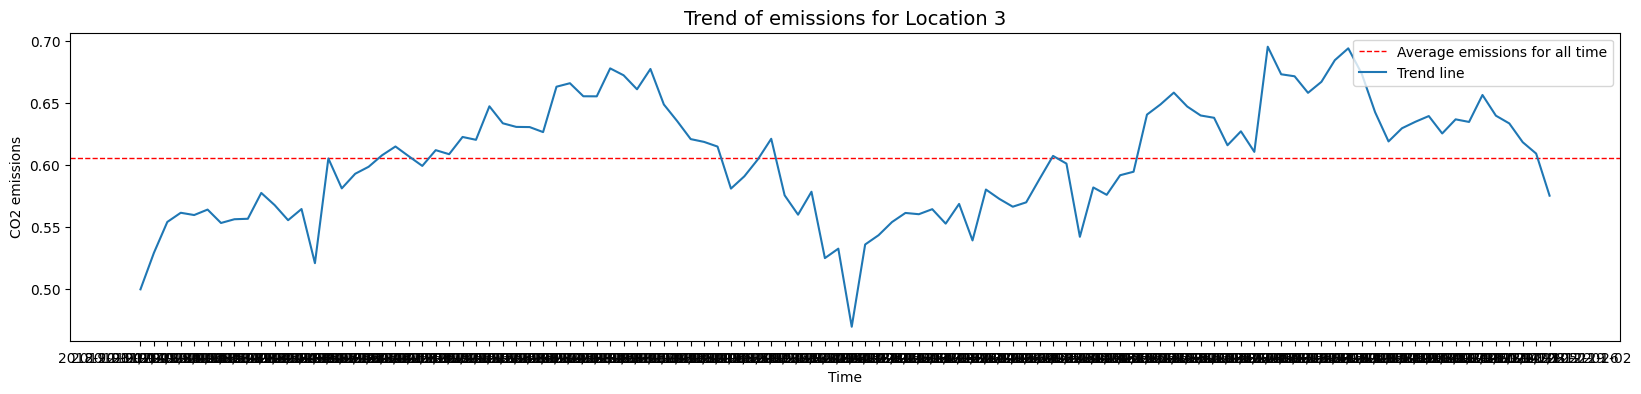

In [4]:
df_v2 = data_handling.load_data_drop_2020()

#Labels should be the coordinates of the first three locations in the dataframe with 2020 removed
locations = df_v2["coordinates"].unique()[0:3]

loc_counter = 1

for loc in locations:
        df_loc = df_v2[df_v2["coordinates"] == loc]
        index = df_loc.index
        plt.figure(figsize=(20,4))
        plt.axhline (y =df_loc['emission'].mean(), color='red', linewidth = 1, linestyle ='dashed', label = 'Average emissions for all time')
        sns.lineplot(data=df_loc, x=df_loc.index.astype(str), y='emission', label = 'Trend line')
        plt.title(f'Trend of emissions for Location {loc_counter}', fontsize=14)
        plt.legend(loc = 'upper right')
        plt.xlabel('Time')
        plt.ylabel('CO2 emissions')
        plt.show()
        print('\n')

        loc_counter += 1

Removing 2020 from the data does shift the trendline for each investigated location up a bit. However, it does mean losing a third of the dataset. Therefore, we will keep 2020 as part of the data in favour of having a larger dataset to work off.

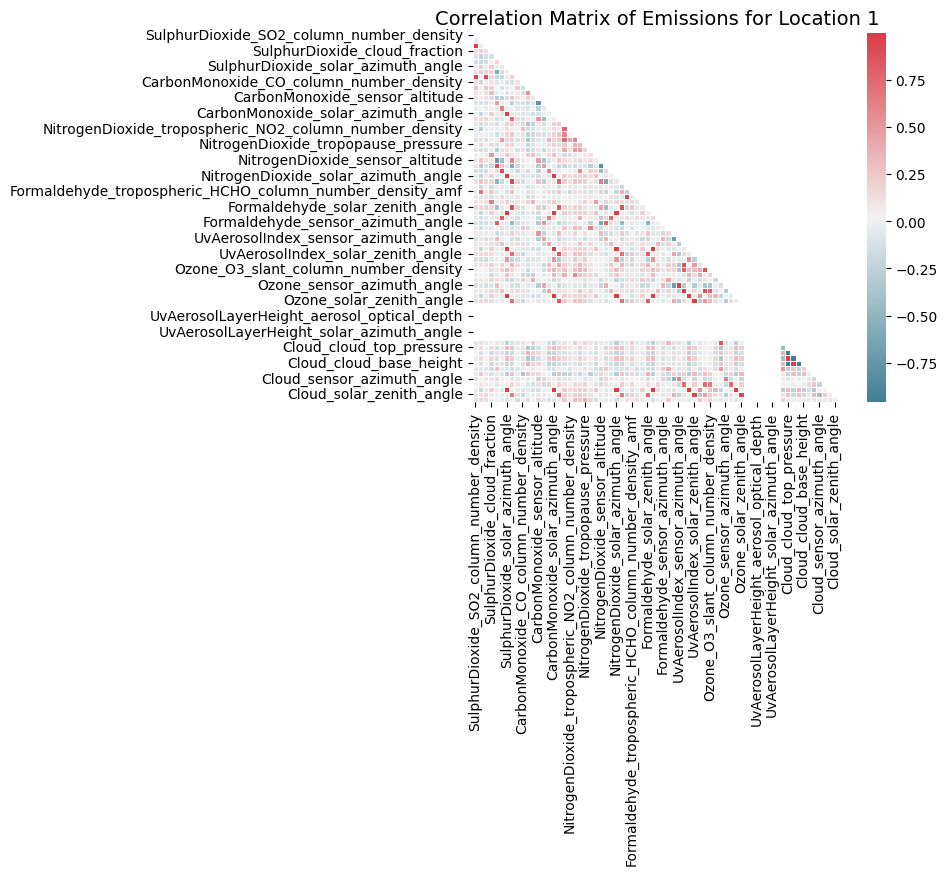

,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,SulphurDioxide_solar_azimuth_angle,SulphurDioxide_solar_zenith_angle,SulphurDioxide_SO2_column_number_density_15km,CarbonMonoxide_CO_column_number_density,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
SulphurDioxide_SO2_column_number_density,1.000000,-0.024470,0.979172,0.146025,-0.102463,-0.140203,-0.025229,0.131218,0.922141,0.109944,...,0.022830,-0.019444,0.021448,-0.078476,0.083088,-0.072518,0.024142,-0.027117,0.125040,-0.110323
SulphurDioxide_SO2_column_number_density_amf,-0.024470,1.000000,0.052045,0.226319,-0.233294,-0.179398,-0.197549,0.222453,0.071917,-0.160113,...,-0.112378,0.155294,-0.115943,-0.066857,0.212443,0.030963,0.095529,-0.198902,0.117507,0.180914
SulphurDioxide_SO2_slant_column_number_density,0.979172,0.052045,1.000000,0.163964,-0.146677,-0.160537,-0.032799,0.188254,0.941952,0.056338,...,0.006520,0.001641,0.003714,-0.076733,0.086815,-0.058230,0.056187,-0.035071,0.159718,-0.107928
SulphurDioxide_cloud_fraction,0.146025,0.226319,0.163964,1.000000,-0.119413,0.038124,0.219287,0.183609,0.146091,0.103894,...,-0.151686,0.143161,-0.162799,-0.154504,-0.104022,0.084482,0.000557,0.194964,0.055922,0.009679
SulphurDioxide_sensor_azimuth_angle,-0.102463,-0.233294,-0.146677,-0.119413,1.000000,0.159282,-0.028812,-0.577026,-0.201917,-0.072963,...,0.141532,-0.123313,0.135249,0.259248,-0.041049,0.156452,-0.068742,-0.028788,-0.019204,0.001172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Cloud_sensor_azimuth_angle,-0.072518,0.030963,-0.058230,0.084482,0.156452,0.038564,0.022105,-0.091748,-0.070915,-0.008429,...,0.027163,-0.046180,0.011371,-0.091081,-0.173973,1.000000,-0.227649,0.022952,-0.405857,-0.028624
Cloud_sensor_zenith_angle,0.024142,0.095529,0.056187,0.000557,-0.068742,0.027836,0.042282,0.173110,0.084130,0.006597,...,0.061352,0.009301,0.068798,0.163388,0.251277,-0.227649,1.000000,0.039239,0.226861,0.080917
Cloud_solar_azimuth_angle,-0.027117,-0.198902,-0.035071,0.194964,-0.028788,0.101516,0.989908,0.051368,-0.039130,-0.093414,...,-0.248856,0.337599,-0.249205,-0.141176,-0.302003,0.022952,0.039239,1.000000,0.066629,-0.060392
Cloud_solar_zenith_angle,0.125040,0.117507,0.159718,0.055922,-0.019204,-0.033361,0.069800,0.662802,0.158214,-0.163958,...,-0.185496,0.266611,-0.179249,0.065589,0.328692,-0.405857,0.226861,0.066629,1.000000,0.013598


In [20]:
#Now we investigate the correlation between variables by creating a correlation matrix
import numpy as np
import matplotlib.pyplot as plt

df_loc = df[df["coordinates"]== df["coordinates"].unique()[0]]

#Create dataframe containing the relevant features
df_cor = df_loc.drop(columns=["year","week_no", "coordinates", "ID_LAT_LON_YEAR_WEEK"], axis= 1)
df_cor.reset_index(drop= True, inplace=True)

#Compute the correlation matrix
corr = df_cor.corr()

#Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

#Set everything up for plotting
cmap = sns.diverging_palette(220, 10, as_cmap=True)

#Draw the heatmap
sns.heatmap(corr, mask= mask, square= True, linewidths= 0.5, annot= False, cmap=cmap)

plt.yticks(rotation=0)
plt.title(f'Correlation Matrix of Emissions for Location 1', fontsize=14)
plt.show()

corr


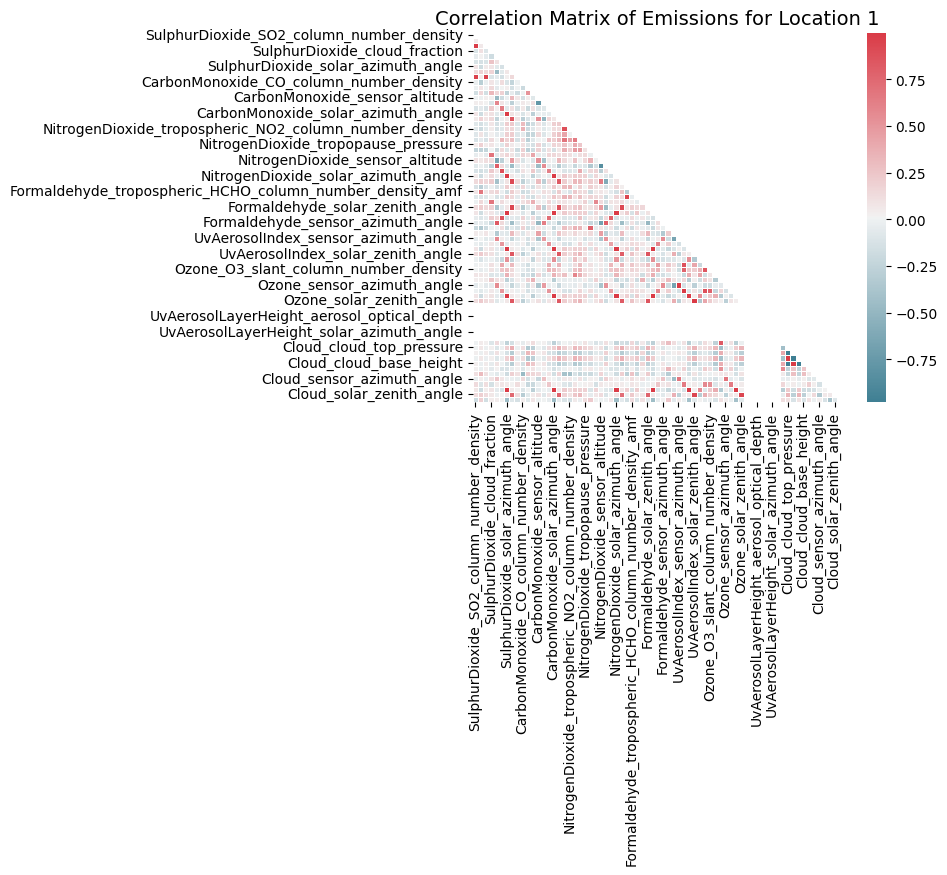

,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,SulphurDioxide_solar_azimuth_angle,SulphurDioxide_solar_zenith_angle,SulphurDioxide_SO2_column_number_density_15km,CarbonMonoxide_CO_column_number_density,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
SulphurDioxide_SO2_column_number_density,1.000000,0.043665,0.987067,-0.110466,-0.039400,-0.112071,0.082853,0.124368,0.953594,-0.017150,...,0.030994,-0.008194,0.036305,0.019413,0.108395,-0.037797,0.129303,0.070027,0.125179,-0.182218
SulphurDioxide_SO2_column_number_density_amf,0.043665,1.000000,0.059608,0.109198,0.017562,-0.135837,-0.173766,0.182510,0.045738,-0.295553,...,-0.013787,0.071069,-0.021198,-0.024076,0.304498,0.036725,-0.105380,-0.181201,0.193939,0.191992
SulphurDioxide_SO2_slant_column_number_density,0.987067,0.059608,1.000000,-0.095983,-0.057251,-0.112819,0.055104,0.146050,0.964507,-0.025375,...,0.046275,-0.027509,0.053009,0.028816,0.104704,-0.026602,0.115637,0.039317,0.129551,-0.158403
SulphurDioxide_cloud_fraction,-0.110466,0.109198,-0.095983,1.000000,-0.178198,0.261889,0.079445,0.165156,-0.100138,0.072895,...,-0.052082,0.028415,-0.050580,-0.061956,-0.006823,0.099089,-0.145854,0.083591,0.069612,0.042684
SulphurDioxide_sensor_azimuth_angle,-0.039400,0.017562,-0.057251,-0.178198,1.000000,0.097106,-0.067439,-0.473093,-0.066314,-0.027624,...,0.101234,-0.091536,0.093629,0.019029,-0.068121,0.242043,0.048028,-0.052351,-0.027439,0.046510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Cloud_sensor_azimuth_angle,-0.037797,0.036725,-0.026602,0.099089,0.242043,0.074163,-0.012166,-0.027420,-0.041282,0.137410,...,0.024744,-0.048202,0.030964,-0.101704,-0.071669,1.000000,-0.136212,-0.006746,-0.340849,0.031615
Cloud_sensor_zenith_angle,0.129303,-0.105380,0.115637,-0.145854,0.048028,0.079443,0.053262,0.016910,0.123119,0.015601,...,0.042223,-0.011699,0.049480,0.199154,0.034080,-0.136212,1.000000,0.016952,0.061388,-0.124052
Cloud_solar_azimuth_angle,0.070027,-0.181201,0.039317,0.083591,-0.052351,-0.122192,0.992762,0.063894,0.016959,-0.101142,...,-0.171571,0.223677,-0.177318,-0.168038,-0.134627,-0.006746,0.016952,1.000000,0.061643,-0.402916
Cloud_solar_zenith_angle,0.125179,0.193939,0.129551,0.069612,-0.027439,0.015923,0.083820,0.744885,0.128973,-0.308473,...,-0.280321,0.341330,-0.281468,0.008720,0.134944,-0.340849,0.061388,0.061643,1.000000,-0.084864


In [21]:
#Now we investigate the correlation between variables by creating a correlation matrix
import numpy as np
import matplotlib.pyplot as plt

df_loc = df[df["coordinates"]== df["coordinates"].unique()[1]]

#Create dataframe containing the relevant features
df_cor = df_loc.drop(columns=["year","week_no", "coordinates", "ID_LAT_LON_YEAR_WEEK"], axis= 1)
df_cor.reset_index(drop= True, inplace=True)

#Compute the correlation matrix
corr = df_cor.corr()

#Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

#Set everything up for plotting
cmap = sns.diverging_palette(220, 10, as_cmap=True)

#Draw the heatmap
sns.heatmap(corr, mask= mask, square= True, linewidths= 0.5, annot= False, cmap=cmap)

plt.yticks(rotation=0)
plt.title(f'Correlation Matrix of Emissions for Location 2', fontsize=14)
plt.show()

corr

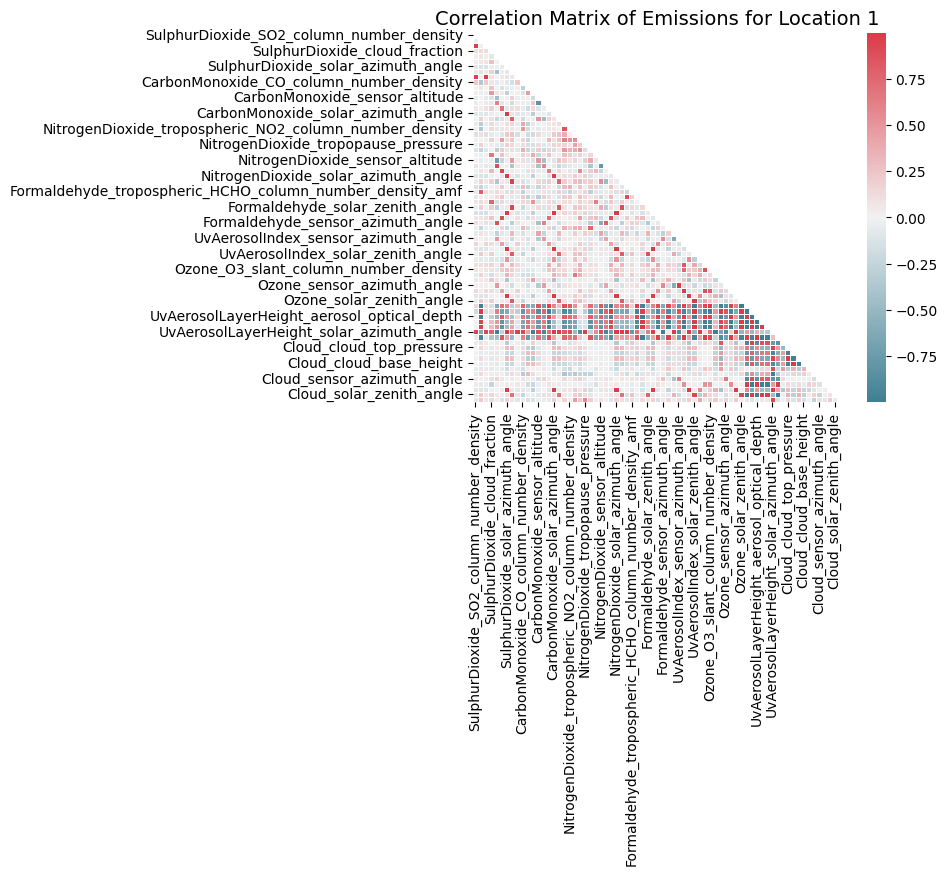

,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,SulphurDioxide_solar_azimuth_angle,SulphurDioxide_solar_zenith_angle,SulphurDioxide_SO2_column_number_density_15km,CarbonMonoxide_CO_column_number_density,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
SulphurDioxide_SO2_column_number_density,1.000000,-0.024253,0.972090,0.108874,0.030738,0.034933,-0.109076,0.047468,0.968616,0.227072,...,-0.008009,0.004473,-0.010154,-0.058199,0.060988,0.044792,0.044690,-0.097826,0.063174,-0.093299
SulphurDioxide_SO2_column_number_density_amf,-0.024253,1.000000,0.019214,0.139882,0.068697,0.072914,-0.122933,0.123336,-0.025714,-0.357750,...,-0.071211,0.137929,-0.066210,0.092390,0.127257,0.026255,-0.063578,-0.118894,0.212016,0.224723
SulphurDioxide_SO2_slant_column_number_density,0.972090,0.019214,1.000000,0.122117,0.030546,0.071930,-0.127261,0.050259,0.977986,0.211564,...,-0.040930,0.037752,-0.043536,-0.062702,0.026650,0.039157,0.044980,-0.112553,0.076108,-0.083934
SulphurDioxide_cloud_fraction,0.108874,0.139882,0.122117,1.000000,-0.088873,0.281460,-0.034837,0.193123,0.088508,0.063388,...,0.061240,-0.082634,0.060276,-0.077965,-0.037307,0.114481,-0.253611,-0.028300,0.144504,0.126239
SulphurDioxide_sensor_azimuth_angle,0.030738,0.068697,0.030546,-0.088873,1.000000,0.010579,-0.023931,-0.438140,-0.006103,-0.062480,...,-0.082117,0.071762,-0.083970,-0.036523,0.048788,0.165748,0.027223,0.000820,0.061155,0.034151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Cloud_sensor_azimuth_angle,0.044792,0.026255,0.039157,0.114481,0.165748,0.083989,-0.008272,0.058641,0.011168,0.081002,...,-0.014928,0.002385,-0.022633,0.038759,-0.166305,1.000000,-0.123425,-0.009452,-0.237110,0.099489
Cloud_sensor_zenith_angle,0.044690,-0.063578,0.044980,-0.253611,0.027223,0.004049,0.053111,-0.028172,0.069283,0.031884,...,-0.083421,0.121016,-0.070198,0.182819,0.151426,-0.123425,1.000000,0.034820,0.024906,-0.099726
Cloud_solar_azimuth_angle,-0.097826,-0.118894,-0.112553,-0.028300,0.000820,-0.048662,0.991881,0.079446,-0.097855,-0.093516,...,-0.257118,0.312045,-0.252768,-0.216984,-0.106147,-0.009452,0.034820,1.000000,0.088504,0.211288
Cloud_solar_zenith_angle,0.063174,0.212016,0.076108,0.144504,0.061155,0.034657,0.108910,0.709429,0.080128,-0.249376,...,-0.293422,0.339572,-0.283687,0.032466,0.181369,-0.237110,0.024906,0.088504,1.000000,0.047786


In [22]:
#Now we investigate the correlation between variables by creating a correlation matrix
import numpy as np
import matplotlib.pyplot as plt

df_loc = df[df["coordinates"]== df["coordinates"].unique()[2]]

#Create dataframe containing the relevant features
df_cor = df_loc.drop(columns=["year","week_no", "coordinates", "ID_LAT_LON_YEAR_WEEK"], axis= 1)
df_cor.reset_index(drop= True, inplace=True)

#Compute the correlation matrix
corr = df_cor.corr()

#Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

#Set everything up for plotting
cmap = sns.diverging_palette(220, 10, as_cmap=True)

#Draw the heatmap
sns.heatmap(corr, mask= mask, square= True, linewidths= 0.5, annot= False, cmap=cmap)

plt.yticks(rotation=0)
plt.title(f'Correlation Matrix of Emissions for Location 3', fontsize=14)
plt.show()

corr

From the above correlation matrices, we can clearly see that the relationship between the features stays the same, which makes sense. However, their correlation with the emission level for each location seems to vary quite a bit. This speaks for the approach of training a separate forecaster for each location.

In [2]:
#Let's explore the relationships between locations
#We need to create a dataframe with the emission levels for each site at each timepoint
import pandas as pd

df_locations = pd.DataFrame(columns=range(len(df["coordinates"].unique())))

loc_counter = 0

for loc in df["coordinates"].unique():

    df_loc = df[df["coordinates"] == loc]

    emission_ls = list(df_loc["emission"])
    df_locations[loc_counter] = emission_ls
    loc_counter += 1

df_locations["year_week"] = df.index[:len(df_locations)]

df_locations

/tmp/ipykernel_1647/2139135071.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_locations["year_week"] = df.index[:len(df_locations)]


,0,1,2,3,4,5,6,7,8,9,...,488,489,490,491,492,493,494,495,496,year_week
0,3.750994,3.857115,0.500023,100.382980,0.076542,64.494600,76.600110,101.643295,40.153328,28.108765,...,69.826860,105.982190,14.774838,23.184301,15.069341,0.106631,41.193130,39.696404,26.111166,2018-12-31/2019-01-06
1,4.025176,4.213432,0.529315,106.375980,0.081001,68.422940,82.630714,109.828674,41.531597,29.032100,...,74.357560,113.068474,15.337234,24.404161,16.217907,0.112878,43.877285,43.529408,28.045977,2019-01-07/2019-01-13
2,4.231381,4.451489,0.554183,110.766335,0.084788,71.011550,86.668290,115.189064,42.774483,29.870031,...,77.722220,118.279810,15.730142,25.097378,16.811665,0.118181,45.760826,45.993286,29.293518,2019-01-14/2019-01-20
3,4.305286,4.553981,0.561553,113.097940,0.085920,72.571780,88.741880,117.846870,43.542730,30.415354,...,79.239920,120.618580,15.979696,25.591475,17.231894,0.119753,46.675327,47.163128,29.950650,2019-01-21/2019-01-27
4,4.347317,4.676066,0.559731,114.985886,0.085650,73.834610,91.137010,120.702270,43.739470,30.567698,...,80.324270,122.382960,15.905249,25.756530,17.642060,0.119364,47.317184,48.742470,30.572742,2019-01-28/2019-02-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,4.736880,4.770357,0.639599,116.865940,0.097723,72.756820,90.329790,120.687530,45.268314,31.397772,...,79.402374,121.018890,15.999958,25.387463,16.179245,0.136397,46.265680,47.328110,29.404171,2021-11-29/2021-12-05
155,4.687898,4.718280,0.633356,116.537730,0.096784,72.485700,89.789320,119.703354,45.388042,31.508383,...,78.948320,120.277370,15.933588,25.222624,16.033224,0.135066,45.971810,46.860140,29.186497,2021-12-06/2021-12-12
156,4.607418,4.683615,0.618269,116.176040,0.094502,72.509610,89.738230,119.317276,45.220715,31.436537,...,78.301430,119.299240,15.800288,25.175623,16.150730,0.131848,45.675720,46.808056,29.131205,2021-12-13/2021-12-19
157,4.470275,4.450044,0.609128,115.053840,0.093149,71.287040,86.832870,114.708620,46.249325,32.232227,...,76.902200,116.869385,15.822737,24.652740,15.336843,0.129899,44.668972,44.268930,28.125792,2021-12-20/2021-12-26


In [3]:

df_locations.set_index(pd.PeriodIndex(df_locations["year_week"], freq="W"),drop=True, inplace= True)
df_locations.drop("year_week", axis= 1, inplace=True)

df_locations

,0,1,2,3,4,5,6,7,8,9,...,487,488,489,490,491,492,493,494,495,496
year_week,,,,,,,,,,,,,,,,,,,,,
2018-12-31/2019-01-06,3.750994,3.857115,0.500023,100.382980,0.076542,64.494600,76.600110,101.643295,40.153328,28.108765,...,5.375411,69.826860,105.982190,14.774838,23.184301,15.069341,0.106631,41.193130,39.696404,26.111166
2019-01-07/2019-01-13,4.025176,4.213432,0.529315,106.375980,0.081001,68.422940,82.630714,109.828674,41.531597,29.032100,...,5.420106,74.357560,113.068474,15.337234,24.404161,16.217907,0.112878,43.877285,43.529408,28.045977
2019-01-14/2019-01-20,4.231381,4.451489,0.554183,110.766335,0.084788,71.011550,86.668290,115.189064,42.774483,29.870031,...,5.327792,77.722220,118.279810,15.730142,25.097378,16.811665,0.118181,45.760826,45.993286,29.293518
2019-01-21/2019-01-27,4.305286,4.553981,0.561553,113.097940,0.085920,72.571780,88.741880,117.846870,43.542730,30.415354,...,5.422680,79.239920,120.618580,15.979696,25.591475,17.231894,0.119753,46.675327,47.163128,29.950650
2019-01-28/2019-02-03,4.347317,4.676066,0.559731,114.985886,0.085650,73.834610,91.137010,120.702270,43.739470,30.567698,...,5.316918,80.324270,122.382960,15.905249,25.756530,17.642060,0.119364,47.317184,48.742470,30.572742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-29/2021-12-05,4.736880,4.770357,0.639599,116.865940,0.097723,72.756820,90.329790,120.687530,45.268314,31.397772,...,4.271950,79.402374,121.018890,15.999958,25.387463,16.179245,0.136397,46.265680,47.328110,29.404171
2021-12-06/2021-12-12,4.687898,4.718280,0.633356,116.537730,0.096784,72.485700,89.789320,119.703354,45.388042,31.508383,...,4.265256,78.948320,120.277370,15.933588,25.222624,16.033224,0.135066,45.971810,46.860140,29.186497
2021-12-13/2021-12-19,4.607418,4.683615,0.618269,116.176040,0.094502,72.509610,89.738230,119.317276,45.220715,31.436537,...,4.360768,78.301430,119.299240,15.800288,25.175623,16.150730,0.131848,45.675720,46.808056,29.131205


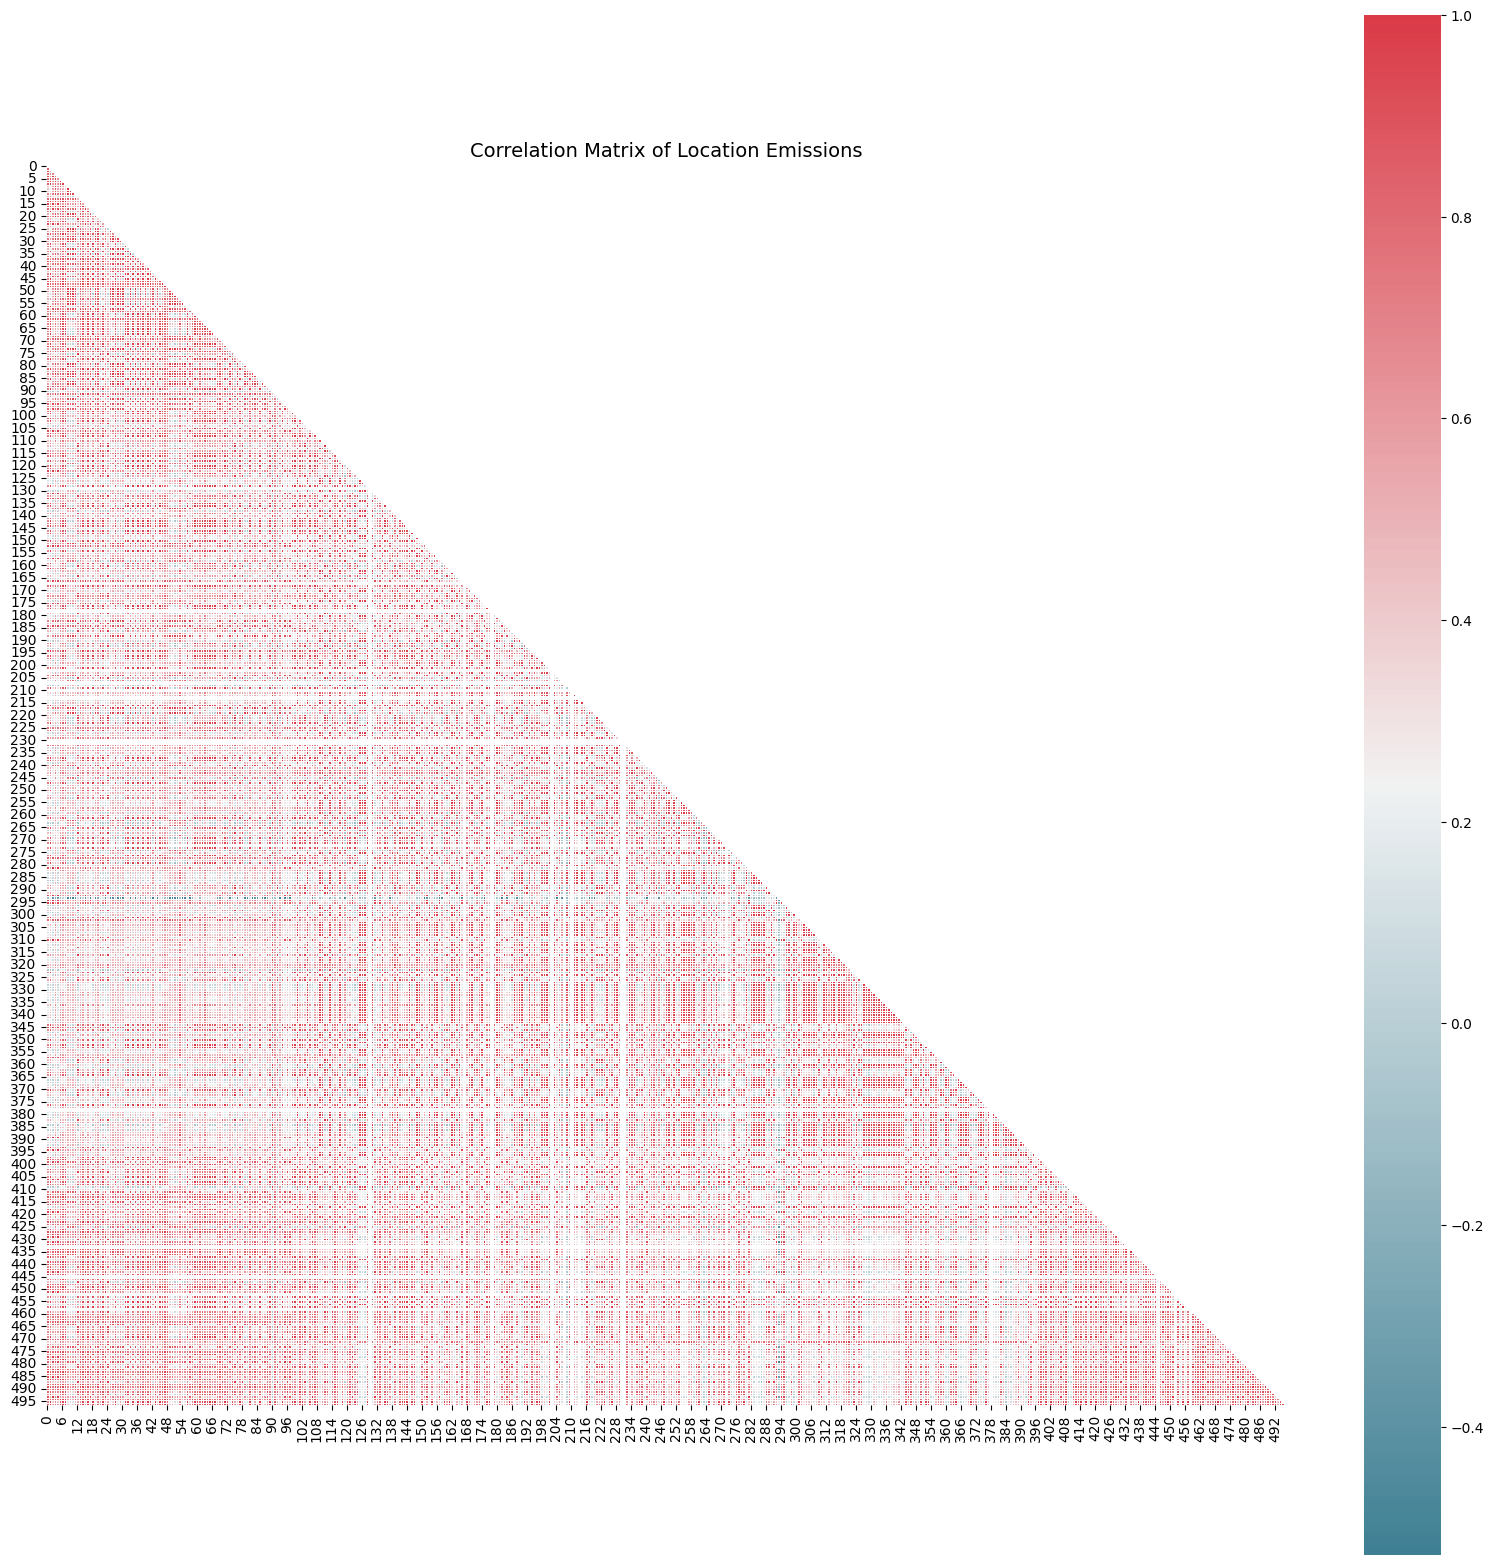

,0,1,2,3,4,5,6,7,8,9,...,487,488,489,490,491,492,493,494,495,496
0,1.000000,0.855073,0.922270,0.766479,0.921026,0.809507,0.793026,0.849517,0.490300,0.456127,...,0.517347,0.871785,0.882850,0.829666,0.820689,0.663626,0.922274,0.888170,0.730770,0.821285
1,0.855073,1.000000,0.588320,0.686242,0.586064,0.835497,0.920335,0.979301,0.232971,0.208444,...,0.583913,0.801191,0.833606,0.645026,0.843903,0.894365,0.588326,0.881283,0.975234,0.954042
2,0.922270,0.588320,1.000000,0.692910,0.999919,0.646609,0.556424,0.597574,0.602142,0.567481,...,0.371439,0.768554,0.761172,0.817297,0.652401,0.368371,1.000000,0.732812,0.414178,0.572734
3,0.766479,0.686242,0.692910,1.000000,0.699627,0.941947,0.885642,0.793233,0.862224,0.851901,...,0.389896,0.944189,0.933631,0.812374,0.706727,0.534728,0.692877,0.889974,0.655103,0.782919
4,0.921026,0.586064,0.999919,0.699627,1.000000,0.650863,0.559143,0.597565,0.612070,0.577737,...,0.369958,0.772489,0.764569,0.820151,0.651973,0.365989,0.999918,0.735025,0.412784,0.573082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,0.663626,0.894365,0.368371,0.534728,0.365989,0.784088,0.813979,0.906497,0.084998,0.067839,...,0.841950,0.653176,0.688479,0.649787,0.913051,1.000000,0.368379,0.800843,0.912301,0.930173
493,0.922274,0.588326,1.000000,0.692877,0.999918,0.646587,0.556408,0.597570,0.602096,0.567434,...,0.371445,0.768533,0.761154,0.817283,0.652401,0.368379,1.000000,0.732799,0.414180,0.572729
494,0.888170,0.881283,0.732812,0.889974,0.735025,0.963181,0.933635,0.938661,0.593861,0.573249,...,0.652653,0.975075,0.983312,0.887558,0.902475,0.800843,0.732799,1.000000,0.843309,0.956083
495,0.730770,0.975234,0.414178,0.655103,0.412784,0.820409,0.928735,0.966023,0.183637,0.166890,...,0.565513,0.755968,0.790713,0.553691,0.795677,0.912301,0.414180,0.843309,1.000000,0.950807


In [33]:
#Create a correlation matrix of all the locations

#Compute the correlation matrix
corr = df_locations.corr()

#Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

#Set everything up for plotting
cmap = sns.diverging_palette(220, 10, as_cmap=True)

#Draw the heatmap
fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(corr, mask= mask, square= True, linewidths= 0.5, annot= False, cmap=cmap, ax=ax)

plt.yticks(rotation=0)
plt.title(f'Correlation Matrix of Location Emissions', fontsize=14)
plt.show()

corr

There appears to be quite a moderate to strong positive correlation between a lot of the locations in the dataset. It would be useful to explore if viable predictions can be made based on the emissions from other sites. It could be possible to chain models together, which are based on the exogenous features and emissions from other locations.

## Training Base Models

In [2]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer


#Select exogenous features and target variable for location 1
df_loc_1= df[df["coordinates"]== df["coordinates"].unique()[3]]
df_loc_1.drop(columns=['ID_LAT_LON_YEAR_WEEK', 'year', 'week_no',
       'coordinates'], inplace= True)

#for each column replace NaN with mean
for col in df_loc_1.columns:
        #Check if all values in column are NaN
        if df_loc_1[col].isnull().sum() == len(df_loc_1[col]):
                df_loc_1[col]= df_loc_1[col].fillna(value=0)
        else:
                mean = df_loc_1[col].mean()
                df_loc_1[col]= df_loc_1[col].fillna(value=mean)
                

#Make sure there are no duplicates in the periodIndex
df_loc_1 = df_loc_1.groupby(df_loc_1.index).mean()

#Split out the exogenous features and target variable
y_loc_1 = df_loc_1["emission"]

X_loc_1 = df_loc_1.drop(columns="emission", axis=1)



/tmp/ipykernel_9733/2756513481.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loc_1.drop(columns=['ID_LAT_LON_YEAR_WEEK', 'year', 'week_no',
/tmp/ipykernel_9733/2756513481.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loc_1[col]= df_loc_1[col].fillna(value=mean)
/tmp/ipykernel_9733/2756513481.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

In [4]:
#Let's train different base models on the standardised data for the first location to see which performs best
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.base import ForecastingHorizon

#train test split the data
y_train, y_val, X_train, X_val = temporal_train_test_split(y=y_loc_1, X=X_loc_1, test_size=0.2)

#The forecasting horizon needs to cover the span of the validation set
fh = ForecastingHorizon(y_val.index, is_relative= False)

print(len(X_train), len(y_train))

check_nan = X_train.isnull().sum()

check_nan[check_nan!=0]

125 125


Series([], dtype: int64)

In [87]:
#First forecaster - TheteForecaster
from sktime.forecasting.theta import ThetaForecaster
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error

forecaster_theta = ThetaForecaster()

forecaster_theta.fit(y=y_train, X=X_train)

y_pred_theta = forecaster_theta.predict(X=X_val, fh=fh)

mae = mean_absolute_error(y_val, y_pred_theta)
mape = mean_absolute_percentage_error(y_val, y_pred_theta)

#We calculate the MAE and MAPE
print(f"Mean Average Error: {mae}")
print(f"Mean Average Percentage Error: {mape}")

Mean Average Error: 6.391605615842976
Mean Average Percentage Error: 0.053904559231025675


In [88]:
#We train an AutoARIMA model for comparison
from sktime.forecasting.arima import AutoARIMA

forecaster_arima = AutoARIMA()

forecaster_arima.fit(y=y_train, X=X_train)

y_pred_arima = forecaster_arima.predict(X=X_val,fh=fh)

mae = mean_absolute_error(y_val, y_pred_arima)
mape = mean_absolute_percentage_error(y_val, y_pred_arima)

#We calculate the MAE and MAPE
print(f"Mean Average Error: {mae}")
print(f"Mean Average Percentage Error: {mape}")

/home/niclaswiegleb/miniconda3/envs/kaggle/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/niclaswiegleb/miniconda3/envs/kaggle/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/niclaswiegleb/miniconda3/envs/kaggle/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/niclaswiegleb/miniconda3/envs/kaggle/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings

KeyboardInterrupt: 

In [5]:
#We train a Prophet forecaster to see how it performs
from sktime.forecasting.fbprophet import Prophet

forecaster_prophet = Prophet()

forecaster_prophet.fit(y=y_train, X=X_train)

y_pred_prophet = forecaster_prophet.predict(X=X_val,fh=fh)

mae = mean_absolute_error(y_val, y_pred_prophet)
mape = mean_absolute_percentage_error(y_val, y_pred_prophet)

#We calculate the MAE and MAPE
print(f"Mean Average Error: {mae}")
print(f"Mean Average Percentage Error: {mape}")

/home/niclaswiegleb/miniconda3/envs/kaggle/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
14:02:52 - cmdstanpy - INFO - Chain [1] start processing
14:02:52 - cmdstanpy - INFO - Chain [1] done processing


NameError: name 'mean_absolute_error' is not defined

We can see from the above that the Prophet model performs best with an MAE of 0.12 and MAPE of 2.72%. We now need to set up a pipeline that trains a model and makes predictions for each location.

## Training Pipeline for All Locations

In [6]:
#We iterate through each unique location in the dataset, split the data, train a model and make predicitions

#list of all locations
locations = list(df["coordinates"].unique())

#Let's capture the MAE and MAPE for each model

mae_locs = []
mape_locs = []

for loc in range(len(locations)):

    #Select exogenous features and target variable for location
    df_loc= df[df["coordinates"]== df["coordinates"].unique()[loc]]
    df_loc.drop(columns=['ID_LAT_LON_YEAR_WEEK', 'year', 'week_no',
        'coordinates'], inplace= True)

    #for each column replace NaN with mean
    for col in df_loc.columns:
            #Check if all values in column are NaN
            if df_loc[col].isnull().sum() == len(df_loc[col]):
                    df_loc[col]= df_loc[col].fillna(value=0)
            else:
                    mean = df_loc[col].mean()
                    df_loc[col]= df_loc[col].fillna(value=mean)

    #Make sure there are no duplicates in the periodIndex
    df_loc = df_loc.groupby(df_loc.index).mean()

    #Split out the exogenous features and target variable
    y_loc = df_loc["emission"]

    X_loc = df_loc.loc[:, df_loc.columns != "emission"]

    #train test split the data
    y_train, y_val, X_train, X_val = temporal_train_test_split(y=y_loc, X=X_loc, test_size=0.2)

    #The forecasting horizon needs to cover the span of the validation set
    fh = ForecastingHorizon(y_val.index, is_relative= False)

    #Train the Prophet model for this location
    forecaster = Prophet()

    forecaster.fit(y=y_train, X=X_train)

    y_pred = forecaster.predict(X=X_val,fh=fh)

    mae = mean_absolute_error(y_val, y_pred)
    mape = mean_absolute_percentage_error(y_val, y_pred)

    mae_locs.append(mae)
    mape_locs.append(mape)
    
    

/tmp/ipykernel_9733/2416396517.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loc.drop(columns=['ID_LAT_LON_YEAR_WEEK', 'year', 'week_no',
/tmp/ipykernel_9733/2416396517.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loc[col]= df_loc[col].fillna(value=mean)
14:03:00 - cmdstanpy - INFO - Chain [1] start processing
14:03:00 - cmdstanpy - INFO - Chain [1] done processing


NameError: name 'mean_absolute_error' is not defined

In [100]:
#We calculate the average MAE and MAPE

print(f"Mean Average Error across locations: {np.mean(mae_locs)}")
print(f"Mean Average Percentage Error across locations: {np.mean(mape_locs)}")

Mean Average Error across locations: 14.977443353306185
Mean Average Percentage Error across locations: 0.18922499813271237


## Make Predictions and Save Submission

In [17]:
#We load the exogenous features from the test data
df_test = data_handling.load_test_data()

coordinates = df_test["coordinates"]

X_test = pd.DataFrame(columns=df_test.columns)
X_test.drop(columns=['ID_LAT_LON_YEAR_WEEK', 'year', 'week_no', "coordinates"], inplace= True)

for loc in df_test["coordinates"].unique():
        df_loc= df_test[df_test["coordinates"]== loc]
        df_loc.drop(columns=['ID_LAT_LON_YEAR_WEEK', 'year', 'week_no', "coordinates"], inplace= True)

        #for each column replace NaN with mean
        for col in df_loc.columns:
                #Check if all values in column are NaN
                if df_loc[col].isnull().sum() == len(df_loc[col]):
                        df_loc[col]= df_loc[col].fillna(value=0)
                else:
                        mean = df_loc[col].mean()
                        df_loc[col]= df_loc[col].fillna(value=mean)

        #Make sure there are no duplicates in the periodIndex
        df_loc = df_loc.groupby(df_loc.index).mean()

        X_test = X_test.append(df_loc)

X_test["coordinates"] = coordinates

X_test

/tmp/ipykernel_9733/3902237403.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loc.drop(columns=['ID_LAT_LON_YEAR_WEEK', 'year', 'week_no', "coordinates"], inplace= True)
/tmp/ipykernel_9733/3902237403.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loc[col]= df_loc[col].fillna(value=mean)
/tmp/ipykernel_9733/3902237403.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_test = X_test.append(df_loc)
/tmp/ipykernel_9733/3902237403.py:11: SettingWithCopyWarni

,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,SulphurDioxide_solar_azimuth_angle,SulphurDioxide_solar_zenith_angle,SulphurDioxide_SO2_column_number_density_15km,CarbonMonoxide_CO_column_number_density,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,coordinates
2021-12-27/2022-01-02,-0.000031,0.805857,-0.000022,0.134192,29.444630,39.054442,-80.938470,24.699498,-0.000009,0.032786,...,8472.313477,41047.937500,7472.313477,7.935617,0.240773,-100.113792,33.697044,-133.047546,33.779583,"(-0.51, 29.29)"
2022-01-03/2022-01-09,0.000456,0.691164,0.000316,0.000000,76.239196,15.600607,-140.529848,28.896124,0.000157,0.037641,...,6476.147323,54915.708579,5476.147161,11.448437,0.293119,-30.510319,42.402593,-138.632822,31.012380,"(-0.51, 29.29)"
2022-01-10/2022-01-16,0.000161,0.605107,0.000106,0.079870,-42.055341,39.889060,-136.908976,30.054682,0.000053,0.037795,...,8984.795703,39006.093750,7984.795703,10.753179,0.267130,39.087361,45.936480,-144.784988,26.743361,"(-0.51, 29.29)"
2022-01-17/2022-01-23,0.000350,0.696917,0.000243,0.201028,72.169566,58.862543,-152.999440,21.806625,0.000093,0.039743,...,6014.724059,57646.368368,5014.724115,11.764556,0.304679,-24.465127,42.140419,-135.027891,29.604774,"(-0.51, 29.29)"
2022-01-24/2022-01-30,-0.000317,0.580527,-0.000184,0.204352,76.190865,15.646016,-135.794754,24.328299,-0.000077,0.039232,...,6849.280477,52896.541873,5849.280394,13.065317,0.284221,-12.907850,30.122641,-135.500119,26.276807,"(-0.51, 29.29)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-31/2022-11-06,-0.000618,0.745549,-0.000461,0.234492,72.306198,61.114494,-123.965439,19.866062,-0.000171,0.034566,...,6260.120033,55483.459980,5260.120056,30.398508,0.180046,-25.528588,45.284576,-116.521412,29.992562,"(-3.299, 30.301)"
2022-11-07/2022-11-13,-0.000010,0.836835,-0.000009,0.166292,5.644498,34.874031,-76.721543,26.611176,-0.000006,0.038438,...,6678.843299,53589.917383,5678.951521,19.223844,0.177833,-13.380005,43.770351,-122.405759,29.017975,"(-3.299, 30.301)"
2022-11-14/2022-11-20,-0.000010,0.836835,-0.000009,0.166292,5.644498,34.874031,-76.721543,26.611176,-0.000006,0.033042,...,5336.282475,62646.761340,4336.282491,13.801194,0.219471,-5.072065,33.226455,-124.530639,30.187472,"(-3.299, 30.301)"
2022-11-21/2022-11-27,0.000071,1.003805,0.000077,0.205077,74.327427,38.215228,-131.809054,26.745795,0.000037,0.030662,...,7188.578533,50728.313991,6188.578464,27.887489,0.247275,-0.668714,45.885617,-129.006797,30.427455,"(-3.299, 30.301)"


In [29]:
#Let's prep the training data

df_train = pd.DataFrame(columns= df.columns)
df_train.drop(columns=['ID_LAT_LON_YEAR_WEEK', 'year', 'week_no'], inplace= True)

for loc in df["coordinates"].unique():

    #Select exogenous features and target variable for location
    df_loc= df[df["coordinates"]== loc]
    coordinates = df_loc["coordinates"]
    df_loc.drop(columns=['ID_LAT_LON_YEAR_WEEK', 'year', 'week_no', 'coordinates'], inplace= True)

    #for each column replace NaN with mean
    for col in df_loc.columns:
            #Check if all values in column are NaN
            if df_loc[col].isnull().sum() == len(df_loc[col]):
                    df_loc[col]= df_loc[col].fillna(value=0)
            else:
                    mean = df_loc[col].mean()
                    df_loc[col]= df_loc[col].fillna(value=mean)

    #Make sure there are no duplicates in the periodIndex
    df_loc = df_loc.groupby(df_loc.index).mean()
    coordinates = coordinates.groupby(coordinates.index).first()

    df_loc["coordinates"] = coordinates

    df_train = df_train.append(df_loc)


df_train

    

/tmp/ipykernel_9733/3956611820.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loc.drop(columns=['ID_LAT_LON_YEAR_WEEK', 'year', 'week_no', 'coordinates'], inplace= True)
/tmp/ipykernel_9733/3956611820.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loc[col]= df_loc[col].fillna(value=mean)
/tmp/ipykernel_9733/3956611820.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(df_loc)
/tmp/ipykernel_9733/3956611820.py:11: SettingWithCopyW

,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,SulphurDioxide_solar_azimuth_angle,SulphurDioxide_solar_zenith_angle,SulphurDioxide_SO2_column_number_density_15km,CarbonMonoxide_CO_column_number_density,...,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission,coordinates
2018-12-31/2019-01-06,-0.000108,0.603019,-0.000065,0.255668,-98.593887,50.843559,-130.050797,35.874496,-0.000027,0.035370,...,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994,"(-0.51, 29.29)"
2019-01-07/2019-01-13,0.000021,0.728214,0.000014,0.130988,16.592861,39.137194,-140.874435,28.965133,0.000012,0.036526,...,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176,"(-0.51, 29.29)"
2019-01-14/2019-01-20,0.000514,0.748199,0.000385,0.110018,72.795837,52.868816,-150.191757,23.206415,0.000154,0.035338,...,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381,"(-0.51, 29.29)"
2019-01-21/2019-01-27,0.000080,0.856283,0.000066,0.141984,2.757432,38.027457,-87.673337,27.081862,0.000027,0.036790,...,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286,"(-0.51, 29.29)"
2019-01-28/2019-02-03,-0.000079,0.676296,-0.000048,0.121164,4.121269,35.515587,-137.409159,24.331972,-0.000028,0.034675,...,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317,"(-0.51, 29.29)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-29/2021-12-05,0.000284,1.195643,0.000340,0.191313,72.820518,55.988022,-140.821274,25.148563,0.000131,0.026488,...,60657.101913,4590.879504,20.245954,0.304797,-35.140368,40.113533,-129.935508,32.095214,29.404171,"(-3.299, 30.301)"
2021-12-06/2021-12-12,0.000083,1.130868,0.000063,0.177222,-12.856753,19.435339,-131.114411,31.197638,0.000030,0.026049,...,60168.191528,4659.130378,6.104610,0.314015,4.667058,47.528435,-134.252871,30.771469,29.186497,"(-3.299, 30.301)"
2021-12-13/2021-12-19,0.000003,0.944682,0.000005,0.169407,-1.474139,37.973965,-81.200528,27.685121,0.000005,0.030098,...,56596.027209,5222.646823,14.817885,0.288058,-0.340922,35.328098,-134.731723,30.716166,29.131205,"(-3.299, 30.301)"
2021-12-20/2021-12-26,-0.000034,0.879397,-0.000028,0.184209,-100.344827,32.599393,-129.573396,33.906037,-0.000015,0.031012,...,46533.348194,6946.858022,32.594768,0.274047,8.427699,48.295652,-139.447849,29.112868,28.125792,"(-3.299, 30.301)"


In [54]:
#Let's set up a pipeline as before, this time training on all the training data and making predictions for the test data

predictions = pd.DataFrame(columns=["ID_LAT_LON_YEAR_WEEK","emission", "coordinates"])

predictions["ID_LAT_LON_YEAR_WEEK"] = df_test["ID_LAT_LON_YEAR_WEEK"]
print(len(predictions["ID_LAT_LON_YEAR_WEEK"]))

emissions = []
coordinates = []

for loc in df_test["coordinates"].unique():

        #Select training data
        df_loc = df_train[df_train["coordinates"]== loc]
        df_loc.drop(columns=['coordinates'], inplace= True)

        #Split out the exogenous features and target variable
        y_loc = df_loc["emission"]

        X_loc = df_loc.drop("emission", axis=1)

        #Select exogenous test data
        X_test_loc = X_test[X_test["coordinates"] == loc]
        coordinates.extend(X_test_loc["coordinates"].to_list())

        X_test_loc.drop(columns=["coordinates"], inplace=True)

        #The forecasting horizon needs to cover the span of the validation set
        fh = ForecastingHorizon(X_test_loc.index, is_relative= False)

        #Train the Prophet model for this location
        forecaster = Prophet()

        forecaster.fit(y=y_loc, X=X_loc)
        
        #Make predictions and append them
        y_pred = forecaster.predict(X=X_test_loc,fh=fh)

        emissions.extend(y_pred.to_list())

predictions["emission"] = emissions
predictions["coordinates"] = coordinates

predictions

24353


/tmp/ipykernel_9733/3124075031.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loc.drop(columns=['coordinates'], inplace= True)
/tmp/ipykernel_9733/3124075031.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_loc.drop(columns=["coordinates"], inplace=True)
15:51:49 - cmdstanpy - INFO - Chain [1] start processing
15:51:49 - cmdstanpy - INFO - Chain [1] done processing
/tmp/ipykernel_9733/3124075031.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

,ID_LAT_LON_YEAR_WEEK,emission,coordinates
year_week,,,
2021-12-27/2022-01-02,ID_-0.510_29.290_2022_00,4.627192,"(-0.51, 29.29)"
2022-01-03/2022-01-09,ID_-0.510_29.290_2022_01,4.630516,"(-0.51, 29.29)"
2022-01-10/2022-01-16,ID_-0.510_29.290_2022_02,4.633840,"(-0.51, 29.29)"
2022-01-17/2022-01-23,ID_-0.510_29.290_2022_03,4.637164,"(-0.51, 29.29)"
2022-01-24/2022-01-30,ID_-0.510_29.290_2022_04,4.640487,"(-0.51, 29.29)"
...,...,...,...
2022-10-31/2022-11-06,ID_-3.299_30.301_2022_44,38.543007,"(-3.299, 30.301)"
2022-11-07/2022-11-13,ID_-3.299_30.301_2022_45,36.957898,"(-3.299, 30.301)"
2022-11-14/2022-11-20,ID_-3.299_30.301_2022_46,35.583227,"(-3.299, 30.301)"


In [55]:
submission = predictions[["ID_LAT_LON_YEAR_WEEK","emission"]]

submission.reset_index(drop=True, inplace=True)

# submission = pd.DataFrame(columns=["id", "num_sold"])

# submission["id"] = range(136950, 164325)
# submission["num_sold"] = list(y_pred_csv.tolist())

file_path = "./submission_v2.csv"

submission.to_csv(file_path, index=False)

In [49]:
predictions

,ID_LAT_LON_YEAR_WEEK,emission,coordinates
year_week,,,
2021-12-27/2022-01-02,ID_-0.510_29.290_2022_00,4.627192,NaN
2022-01-03/2022-01-09,ID_-0.510_29.290_2022_01,4.630516,NaN
2022-01-10/2022-01-16,ID_-0.510_29.290_2022_02,4.633840,NaN
2022-01-17/2022-01-23,ID_-0.510_29.290_2022_03,4.637164,NaN
2022-01-24/2022-01-30,ID_-0.510_29.290_2022_04,4.640487,NaN
...,...,...,...
2022-10-31/2022-11-06,ID_-3.299_30.301_2022_44,38.543007,NaN
2022-11-07/2022-11-13,ID_-3.299_30.301_2022_45,36.957898,NaN
2022-11-14/2022-11-20,ID_-3.299_30.301_2022_46,35.583227,NaN


## Training 2nd Model

We will now train a Porphet model that takes in the emission data for all locations as labels at once, using all the exogenous data for each location at the same timepoint as well. To do this we need to follow these steps:

- Prepare the locations data (y label)
- Prepare the exogenous data (X)
- Normalise each column for both datasets
- Train and validate the model
- Re-train the model on the whole dataset and make predictions for the submission

In [4]:
#Let's load the clean training dataset
import data_handling

df = data_handling.load_data()

#Check the number of locations contained in the dataset
len(df["coordinates"].unique())

497

In [6]:
#We prepare the locations data
import pandas as pd

df_locations = pd.DataFrame(columns=range(len(df["coordinates"].unique())))

loc_counter = 0

for loc in df["coordinates"].unique():

    df_loc = df[df["coordinates"] == loc]

    emission_ls = list(df_loc["emission"])
    df_locations[loc_counter] = emission_ls
    loc_counter += 1

df_locations["year_week"] = df.index[:len(df_locations)]

df_locations.set_index(pd.PeriodIndex(df_locations["year_week"], freq="W"),drop=True, inplace= True)
df_locations.drop("year_week", axis= 1, inplace=True)

df_locations.head(3)

/tmp/ipykernel_1861/1262630787.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_locations["year_week"] = df.index[:len(df_locations)]


,0,1,2,3,4,5,6,7,8,9,...,487,488,489,490,491,492,493,494,495,496
year_week,,,,,,,,,,,,,,,,,,,,,
2018-12-31/2019-01-06,3.750994,3.857115,0.500023,100.382980,0.076542,64.49460,76.600110,101.643295,40.153328,28.108765,...,5.375411,69.82686,105.982190,14.774838,23.184301,15.069341,0.106631,41.193130,39.696404,26.111166
2019-01-07/2019-01-13,4.025176,4.213432,0.529315,106.375980,0.081001,68.42294,82.630714,109.828674,41.531597,29.032100,...,5.420106,74.35756,113.068474,15.337234,24.404161,16.217907,0.112878,43.877285,43.529408,28.045977
2019-01-14/2019-01-20,4.231381,4.451489,0.554183,110.766335,0.084788,71.01155,86.668290,115.189064,42.774483,29.870031,...,5.327792,77.72222,118.279810,15.730142,25.097378,16.811665,0.118181,45.760826,45.993286,29.293518


In [10]:
#Next we prepare the exogenous data

#Create list of columns names that contain location, matching the emission dataframe, and exogenous feature
X_columns = []

for col in df_locations.columns:

    for f in df.columns:

        if f in ['ID_LAT_LON_YEAR_WEEK', 'year', 'week_no', 'coordinates']:
            continue

        else:
            col_name = f"{col}-{f}"
            X_columns.append(col_name)

len(X_columns)


35287

In [21]:
#Create datafram with columns and fill with corresponding data
X_df = pd.DataFrame(columns=X_columns)

for col in X_df.columns:

    f_name = str(col).split("-")[1]
    loc = str(col).split("-")[0]

    df_loc = df[df["coordinates"] == df["coordinates"].unique()[int(loc)]]

    f_data = df_loc[f_name].to_list()
    X_df[col] = f_data

X_df.head(3)

In [ ]:
X_df.info()

In [ ]:
#We set the Period index of the X_df dataframe to match our locations data
X_df["year_week"] = df_locations.index

X_df.set_index(pd.PeriodIndex(X_df["year_week"], freq="W"),drop=True, inplace= True)
X_df.drop("year_week", axis= 1, inplace=True)

X_df.head(3)

In [ ]:
#We fill in any NaN values for the exogenous data

for col in X_df.columns:
        #Check if all values in column are NaN
        if X_df[col].isnull().sum() == len(X_df[col]):
                X_df[col]= X_df[col].fillna(value=0)
        else:
                mean = X_df[col].mean()
                X_df[col]= X_df[col].fillna(value=mean)

In [ ]:
file_path = "./X_df.csv"

submission.to_csv(file_path)

In [ ]:
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.base import ForecastingHorizon

#train test split the data
y_train, y_val, X_train, X_val = temporal_train_test_split(y=df_locations, X=X_df, test_size=0.2)

#The forecasting horizon needs to cover the span of the validation set
fh = ForecastingHorizon(y_val.index, is_relative= False)

print(len(y_train), len(y_val))

In [ ]:
forecaster_prophet = Prophet()

forecaster_prophet.fit(y=y_train, X=X_train)

y_pred_prophet = forecaster_prophet.predict(X=X_val, fh=fh)

In [ ]:
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_val, y_pred_arima)
mape = mean_absolute_percentage_error(y_val, y_pred_arima)

#We calculate the MAE and MAPE
print(f"Mean Average Error: {mae}")
print(f"Mean Average Percentage Error: {mape}")

## NOTES

- Standardise data before training
- check how many locations
- Possibly separate forecasters for each location?
- There are NaN present in the dataset
